In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
from misc import preprocessing, normalization, predict
from material_models import GOH_fullyinc
GOH_params = [1.02356332e-02, 5.13664702e-01, 5.91491834e+01, 2.74447648e-01, 1.57079633e+00]

fsize=10
pltparams = {'legend.fontsize': 'large',
          'figure.figsize': (fsize*1.75,fsize*1.75),
          'font.size'     : 1.4*fsize,
          'axes.labelsize': 1.6*fsize,
          'axes.titlesize': 1.4*fsize,
          'xtick.labelsize': 1.4*fsize,
          'ytick.labelsize': 1.4*fsize,
          'lines.linewidth': 2,
          'lines.markersize': 7,
          'axes.titlepad': 25,
          "mathtext.fontset": 'dejavuserif',
          'axes.labelpad': 5}
plt.rcParams.update(pltparams)
#plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.inferno(np.linspace(0, 0.8,2)))

In [2]:
dataset_name = 'P1C1_s_noisy001'
model_name = dataset_name
ndata, I1, I2, I4a, I4s, Psi_gt001, X, Y, sigma_gt001, F, C, C_inv  = preprocessing(dataset_name)
sigma_pr001, _, _, _, _, Psi_pr001 = predict(model_name, dataset_name)

dataset_name = 'P1C1_s_noisy005'
model_name = dataset_name
ndata, I1, I2, I4a, I4s, Psi_gt005, X, Y, sigma_gt005, F, C, C_inv  = preprocessing(dataset_name)
sigma_pr005, _, _, _, _, Psi_pr005 = predict(model_name, dataset_name)

dataset_name = 'P1C1_s_noisy010'
model_name = dataset_name
ndata, I1, I2, I4a, I4s, Psi_gt010, X, Y, sigma_gt010, F, C, C_inv  = preprocessing(dataset_name)
sigma_pr010, _, _, _, _, Psi_pr010 = predict(model_name, dataset_name)

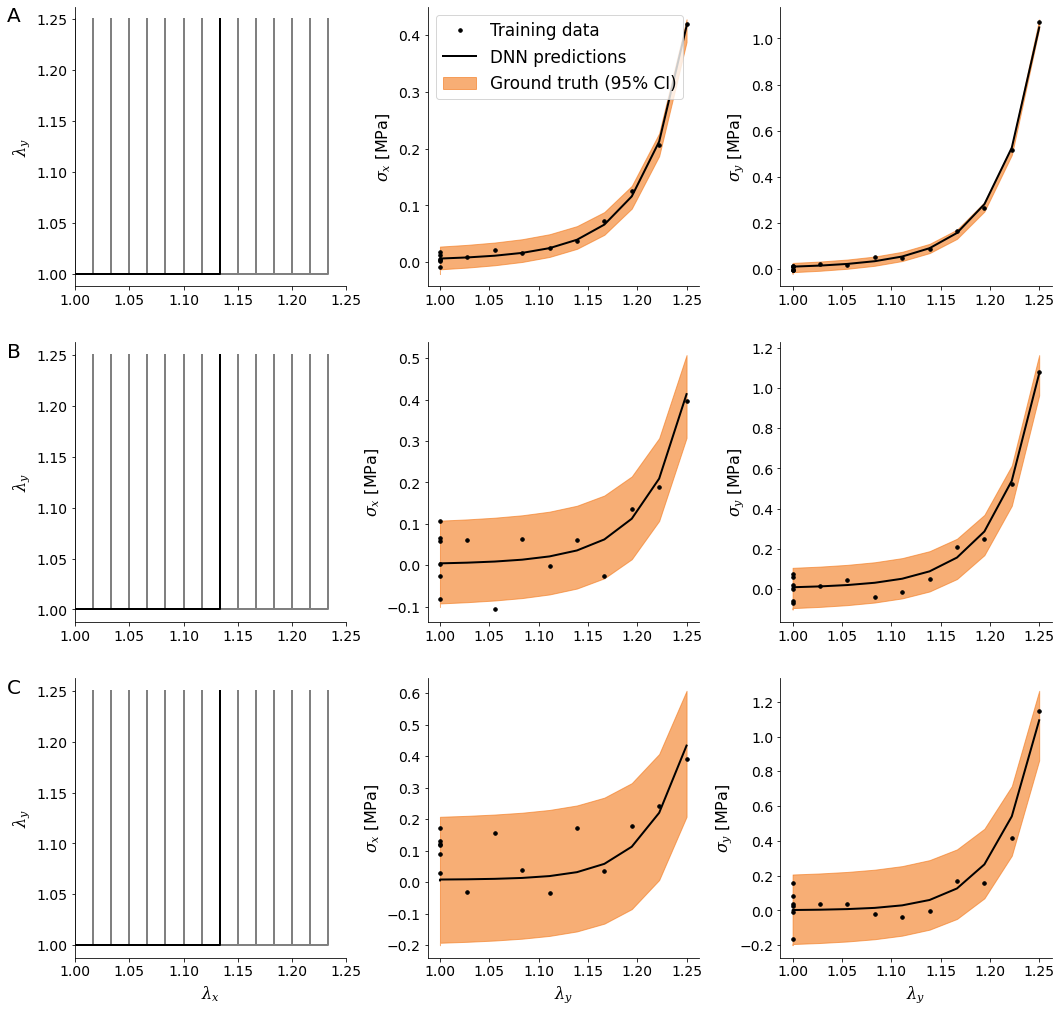

In [6]:
c1 = plt.cm.inferno(0.7)
i1 = 8*15
i2 = i1+15

GOH = GOH_fullyinc(X[i1:i2], GOH_params[0], GOH_params[1], GOH_params[2], GOH_params[3], GOH_params[4])
sigma_pr = GOH.s(X[i1:i2])

fig, ax = plt.subplots(3,3)
fig.subplots_adjust(wspace=0.3)

prs = [sigma_pr001, sigma_pr005, sigma_pr010]
gts = [sigma_gt001, sigma_gt005, sigma_gt010]
noises = [0.01, 0.05, 0.1]

for i, (pr, gt, noise) in enumerate(zip(prs, gts, noises)):

    #Draw the gray lines on the leftmost panels
    for j in range(15):
        j1 = j*15
        j2 = j1 + 15
        ax[i,0].plot(X[j1:j2,0], X[j1:j2,1],'gray')
    ax[i,0].plot(X[i1:i2,0], X[i1:i2,1],'k')

    ax[i,1].plot(X[i1:i2,1], gt[i1:i2,0,0],'k.', label='Training data')
    ax[i,1].plot(X[i1:i2,1], pr[i1:i2,0,0],'k-', label='DNN predictions')
    ax[i,1].fill_between(X[i1:i2,1], sigma_pr[:,0,0]+2*noise, sigma_pr[:,0,0]-2*noise, alpha=0.6, color=c1, label='Ground truth (95% CI)')

    ax[i,2].plot(X[i1:i2,1], gt[i1:i2,1,1],'k.')
    ax[i,2].plot(X[i1:i2,1], pr[i1:i2,1,1],'k-')
    ax[i,2].fill_between(X[i1:i2,1], sigma_pr[:,1,1]+2*noise, sigma_pr[:,1,1]-2*noise, alpha=0.6, color=c1)
    

for i in range(3):
    ax[i,0].set(ylabel='$\lambda_y$', xlim=[1,1.25])
    ax[i,1].set(ylabel='$\sigma_x$ [MPa]')
    ax[i,2].set(ylabel='$\sigma_y$ [MPa]')


    for j in range(3):
        ax[i,j].spines['top'].set_visible(False)
        ax[i,j].spines['right'].set_visible(False)


ax[2,0].set(xlabel='$\lambda_x$')
ax[2,1].set(xlabel='$\lambda_y$')
ax[2,2].set(xlabel='$\lambda_y$')
ax[0,1].legend()
ax[0,0].text(-0.25,1.0, 'A', transform=ax[0,0].transAxes, va='top', fontsize=20)
ax[1,0].text(-0.25,1.0, 'B', transform=ax[1,0].transAxes, va='top', fontsize=20)
ax[2,0].text(-0.25,1.0, 'C', transform=ax[2,0].transAxes, va='top', fontsize=20)

fig.savefig('figs/fig_noisy.jpg', dpi=300, bbox_inches='tight')